# This notebook plot the similarity scores as barplots for the TCPS dataset SER vs AD dTE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [2]:
from matplotlib.patches import Patch

In [3]:
import sequence_comparison as seqComp

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## load data and make sumamry report

In [5]:
tcps_files =pd.Series( os.listdir("./sequence_similarity_results/") )
tcps_files = tcps_files[tcps_files.str.startswith("tcps") & tcps_files.str.endswith( 'identity.csv')  ]

In [6]:
tcps_files

0      tcps_ser_up_top50_pairwise_identity.csv
3      tcps_ser_up_top20_pairwise_identity.csv
13        tcps_ad_up_all_pairwise_identity.csv
20    tcps_ser_up_last50_pairwise_identity.csv
22     tcps_ser_up_top10_pairwise_identity.csv
dtype: object

In [14]:
num_elements = [50,20,9, 50, 10 ]

In [7]:
"tcps_ser_up_top50_pairwise_identity.csv".split("_")

['tcps', 'ser', 'up', 'top50', 'pairwise', 'identity.csv']

In [18]:
summary_df = pd.DataFrame(index = ['avg_pctIdentity', 'std_pctIdentity', 'num_element'])
df_ls = []

for i,tf in enumerate( tcps_files):
    # get data meta information
    f_info = tf.split("_")[1:4] 
    f_id = "_".join( f_info)
    num = num_elements[i]
    
    # load df
    df = pd.read_csv("./sequence_similarity_results/" + tf, header = 0, index_col = None )
    
    #get avg and std score
    avg_score = df['PercentIdentity'].mean()
    std_score = df['PercentIdentity'].std()

    # add result to the result df
    summary_df[ f_id ] = [ avg_score, std_score, num ]
    df_ls.append( df )
    
    
    

In [19]:
#df_ls[0]

In [20]:
summary_df

,ser_up_top50,ser_up_top20,ad_up_all,ser_up_last50,ser_up_top10
avg_pctIdentity,41.474347,45.151830,37.398733,34.316269,37.022470
std_pctIdentity,16.967143,19.354933,14.883727,18.567237,17.734659
num_element,50.000000,20.000000,9.000000,50.000000,10.000000


In [21]:
summary_df.loc['condition'] = ['SER_UP' , 'SER_UP' , 'AD_UP' , 'SER_UP', 'SER_UP']

In [22]:
summary_df = summary_df.T

In [23]:
summary_df

,avg_pctIdentity,std_pctIdentity,num_element,condition
ser_up_top50,41.474347,16.967143,50.0,SER_UP
ser_up_top20,45.15183,19.354933,20.0,SER_UP
ad_up_all,37.398733,14.883727,9.0,AD_UP
ser_up_last50,34.316269,18.567237,50.0,SER_UP
ser_up_top10,37.02247,17.734659,10.0,SER_UP


## Visualize summary for AD and SER samples

In [27]:
summary_df.sort_values( by = 'num_element', ascending= True, inplace= True )
summary_df.index

Index(['ad_up_all', 'ser_up_top10', 'ser_up_top20', 'ser_up_top50',
       'ser_up_last50'],
      dtype='object')

In [29]:
summary_df = summary_df.loc[ ['ser_up_top10', 'ser_up_top20', 'ser_up_top50', 'ser_up_last50','ad_up_all']]

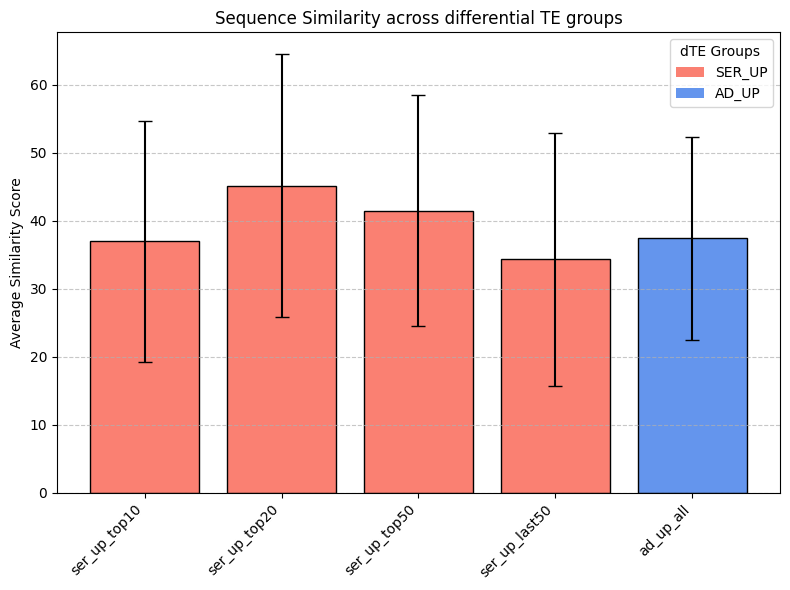

In [30]:
condition_colors = {
    #'control': 'gray',
    'SER_UP': 'salmon',
    'AD_UP':'cornflowerblue'
}

bar_colors = [condition_colors[cond] for cond in summary_df['condition'] ]

plt.figure(figsize=(8, 6))


plt.bar(summary_df.index, summary_df['avg_pctIdentity'] , yerr=summary_df['std_pctIdentity'], capsize=5, color=bar_colors, edgecolor='black')

plt.xticks(rotation=45, ha='right') 

legend_elements = [Patch(facecolor=color, label=cond) for cond, color in condition_colors.items()]
plt.legend(handles=legend_elements, title='dTE Groups ')

plt.ylabel('Average Similarity Score')
plt.title('Sequence Similarity across differential TE groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [50]:
summary_df

,avg_pctIdentity,std_pctIdentity,num_element,condition
ser_up_top10,37.02247,17.734659,10.0,SER_UP
ser_up_top20,45.15183,19.354933,20.0,SER_UP
ser_up_top50,41.474347,16.967143,50.0,SER_UP
ser_up_last50,34.316269,18.567237,50.0,SER_UP
ad_up_all,37.398733,14.883727,9.0,AD_UP


## make randomly selected samples as control to compare the scores
- rand10x3, rand20x3, rand50 x3

### make fasta 

In [34]:
resampled_df = pd.read_csv("./resampled_TCPS_all_TE_indi.csv", header = 0, index_col= 0 )
resampled_df.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen,absolute_LFC
36886,MIRc_22786,0.066390,1.682504,4.531276,0.371309,0.710407,0.999991,chr3,131001128,131001156,+,28,1.682504
53559,L1ME1_10466,0.043117,0.617888,4.538229,0.136152,0.891701,0.999991,chr5,133979389,133979415,-,26,0.617888
131270,L1ME4a_28134,0.085216,0.737378,3.899024,0.189119,0.850000,0.999991,chr15,52291703,52291731,-,28,0.737378
46781,LTR6A_51,1.789616,0.056481,0.671609,0.084098,0.932979,0.999991,chr4,143425059,143425087,-,28,0.056481
100591,L2c_90080,2.784909,3.665215,1.451265,2.525531,0.011552,0.455554,chr10,104039148,104039173,+,25,3.665215


In [38]:
rand_df_ls = []
rand_df_names = [] # rand{n_element}_{rep}

n_elements = [ 10, 20, 50 ]
nreps = 3

for ele in n_elements:
    for rep in range(nreps):
        subdf = resampled_df.sample( n = ele, random_state= 250+rep ) #my number when I do research @_@
        rand_name = f"rand{ele}_{rep+1}"
        print( rand_name )

        rand_df_ls.append( subdf )
        rand_df_names.append( rand_name )


rand10_1
rand10_2
rand10_3
rand20_1
rand20_2
rand20_3
rand50_1
rand50_2
rand50_3


In [40]:
rand_df_ls[0].head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen,absolute_LFC
13516,HAL1b_255,0.036374,0.505906,3.740935,0.135235,0.892426,0.999991,chr1,186341832,186341972,-,140,0.505906
91773,L1P1_1954,0.411412,0.551971,1.038788,0.531361,0.595169,0.999991,chrX,77843843,77847573,-,3730,0.551971
72707,LTR78_2442,0.054661,0.588301,4.538197,0.129633,0.896857,0.999991,chr7,123148490,123149274,-,784,0.588301
84785,MIRb_114810,0.152713,0.992725,1.635417,0.607016,0.543840,0.999991,chr9,93108033,93108118,+,85,0.992725
26610,L1HS_219,0.041962,1.068264,4.534804,0.235570,0.813766,0.999991,chr2,197062487,197068374,+,5887,1.068264


In [41]:
rand_df_ls[1].head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen,absolute_LFC
138302,L1ME4c_7460,0.172153,0.847717,1.181313,0.717605,0.473001,0.999991,chr16,27233162,27233376,+,214,0.847717
13679,THE1D-int_101,0.056834,0.389958,3.120303,0.124974,0.900544,0.999991,chr1,195384306,195385932,+,1626,0.389958
82054,AluJb_59205,0.125744,0.005216,1.622701,0.003215,0.997435,0.999991,chr9,19088962,19089278,+,316,0.005216
10678,AluSx1_5792,2.353492,0.202707,0.560155,0.361876,0.717444,0.999991,chr1,150693849,150694151,-,302,0.202707
118886,L2b_70244,0.102661,0.108647,1.584876,0.068553,0.945346,0.999991,chr12,121908541,121909224,-,683,0.108647


In [42]:
region_df_cols = ['genoName', 'genoStart', 'genoEnd', 'strand', 'TE name' ]

In [43]:
hg38_ref_path = '/home/lucy/Dropbox/human_ref_genome/hg38_grch38/hg38.fa'

In [44]:
for i,d in enumerate( rand_df_ls):
    seqComp.extract_ucsc_bedlike_regions( genome_fasta= hg38_ref_path,
                                         regions_df= d[region_df_cols ], 
                                         output_fasta='./sequence_similarity_input/' + 'tcps_' + rand_df_names[i] +'.fasta') 

✅ Extracted sequences saved to: ./sequence_similarity_input/tcps_rand10_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/tcps_rand10_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/tcps_rand10_3.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/tcps_rand20_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/tcps_rand20_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/tcps_rand20_3.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/tcps_rand50_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/tcps_rand50_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/tcps_rand50_3.fasta


### calculate scores for the random samples

In [48]:
import time

In [45]:
input_dir = './sequence_similarity_input/'

In [46]:
fnames = pd.Series( os.listdir( input_dir ) )
fnames = fnames[ fnames.str.startswith( 'tcps_rand') ]
fnames

8     tcps_rand10_3.fasta
11    tcps_rand10_2.fasta
19    tcps_rand20_3.fasta
20    tcps_rand20_1.fasta
21    tcps_rand50_1.fasta
28    tcps_rand10_1.fasta
29    tcps_rand50_2.fasta
30    tcps_rand20_2.fasta
34    tcps_rand50_3.fasta
dtype: object

In [49]:
for f in fnames:
    print( f'Processing {f}')
    TIME_S = time.time()
    seqComp.process_group(input_dir + f, out_dir="sequence_similarity_results", n_jobs=4,plot_heatmap=True )
    TIME_E = time.time()
    TOTAL_TIME = (TIME_E - TIME_S)/60
    print( f"Time used: {TOTAL_TIME:.1f} min" )

Processing tcps_rand10_3.fasta
Loaded 10 sequences from ./sequence_similarity_input/tcps_rand10_3.fasta
Average identity: 32.55% ± 19.05%
Time used: 0.0 min
Processing tcps_rand10_2.fasta
Loaded 10 sequences from ./sequence_similarity_input/tcps_rand10_2.fasta
Average identity: 38.27% ± 19.04%
Time used: 0.0 min
Processing tcps_rand20_3.fasta
Loaded 20 sequences from ./sequence_similarity_input/tcps_rand20_3.fasta
Average identity: 28.37% ± 20.57%
Time used: 0.1 min
Processing tcps_rand20_1.fasta
Loaded 20 sequences from ./sequence_similarity_input/tcps_rand20_1.fasta
Average identity: 28.52% ± 19.07%
Time used: 0.1 min
Processing tcps_rand50_1.fasta
Loaded 50 sequences from ./sequence_similarity_input/tcps_rand50_1.fasta
Average identity: 31.66% ± 19.24%
Time used: 0.3 min
Processing tcps_rand10_1.fasta
Loaded 10 sequences from ./sequence_similarity_input/tcps_rand10_1.fasta
Average identity: 24.64% ± 18.86%
Time used: 0.0 min
Processing tcps_rand50_2.fasta
Loaded 50 sequences from ./

### load result df and make summary df

In [53]:
tcps_rand_files =pd.Series( os.listdir("./sequence_similarity_results/") )
tcps_rand_files = tcps_rand_files[tcps_rand_files.str.startswith("tcps_rand") & tcps_rand_files.str.endswith( 'identity.csv')  ]

In [56]:
tcps_rand_files

2     tcps_rand10_1_pairwise_identity.csv
7     tcps_rand20_1_pairwise_identity.csv
8     tcps_rand20_2_pairwise_identity.csv
11    tcps_rand20_3_pairwise_identity.csv
15    tcps_rand50_3_pairwise_identity.csv
27    tcps_rand50_2_pairwise_identity.csv
37    tcps_rand50_1_pairwise_identity.csv
40    tcps_rand10_2_pairwise_identity.csv
45    tcps_rand10_3_pairwise_identity.csv
dtype: object

In [58]:
num_elements = [f.split("_")[1].split('d')[1] for f in tcps_rand_files ]
print( num_elements )
f_ids = [ "_".join( f.split("_")[1:3] ) for f in tcps_rand_files ]
print( f_ids )

['10', '20', '20', '20', '50', '50', '50', '10', '10']
['rand10_1', 'rand20_1', 'rand20_2', 'rand20_3', 'rand50_3', 'rand50_2', 'rand50_1', 'rand10_2', 'rand10_3']


In [75]:
rand_summary_df = pd.DataFrame(index = ['avg_pctIdentity', 'std_pctIdentity', 'num_element'])
rand_df_ls = []

for i,tf in enumerate( tcps_rand_files):
    # get data meta information
    f_id = f_ids[i]
    num = int( num_elements[i] )
    
    # load df
    df = pd.read_csv("./sequence_similarity_results/" + tf, header = 0, index_col = None )
    
    #get avg and std score
    avg_score = df['PercentIdentity'].mean()
    std_score = df['PercentIdentity'].std()

    # add result to the result df
    rand_summary_df[ f_id ] = [ avg_score, std_score, num ]
    rand_df_ls.append( df )
    
    
    

In [19]:
#df_ls[0]

In [76]:
rand_summary_df

,rand10_1,rand20_1,rand20_2,rand20_3,rand50_3,rand50_2,rand50_1,rand10_2,rand10_3
avg_pctIdentity,24.643343,28.515882,34.233956,28.367169,31.454366,34.088045,31.655378,38.265915,32.546280
std_pctIdentity,19.075596,19.120074,19.617284,20.623324,19.369896,19.630821,19.250411,19.259667,19.269663
num_element,10.000000,20.000000,20.000000,20.000000,50.000000,50.000000,50.000000,10.000000,10.000000


In [77]:
rand_summary_df.loc['condition'] = ['control' for i in range( rand_summary_df.shape[1]) ]

In [78]:
rand_summary_df = rand_summary_df.T

In [79]:
rand_summary_df.head()

,avg_pctIdentity,std_pctIdentity,num_element,condition
rand10_1,24.643343,19.075596,10.0,control
rand20_1,28.515882,19.120074,20.0,control
rand20_2,34.233956,19.617284,20.0,control
rand20_3,28.367169,20.623324,20.0,control
rand50_3,31.454366,19.369896,50.0,control


In [80]:
rand_summary_df.sort_values( by = 'num_element', ascending= True , inplace= True )

In [81]:
summary_df.head()

,avg_pctIdentity,std_pctIdentity,num_element,condition
ser_up_top10,37.02247,17.734659,10.0,SER_UP
ser_up_top20,45.15183,19.354933,20.0,SER_UP
ser_up_top50,41.474347,16.967143,50.0,SER_UP
ser_up_last50,34.316269,18.567237,50.0,SER_UP
ad_up_all,37.398733,14.883727,9.0,AD_UP


In [82]:
total_sum_df = pd.concat( [  rand_summary_df, summary_df, ] , axis = 0 , ignore_index= False)

In [83]:
total_sum_df.head()

,avg_pctIdentity,std_pctIdentity,num_element,condition
rand10_1,24.643343,19.075596,10.0,control
rand10_2,38.265915,19.259667,10.0,control
rand10_3,32.54628,19.269663,10.0,control
rand20_1,28.515882,19.120074,20.0,control
rand20_2,34.233956,19.617284,20.0,control


### plot the summary df

In [4]:
total_sum_df = pd.read_csv("./TCPS_seq_similarity_summary_df.csv", header = 0, index_col = 0 )

In [5]:
condition_colors = {
    'control': 'gray',
    'SER_UP': 'salmon',
    'AD_UP':'cornflowerblue'
}

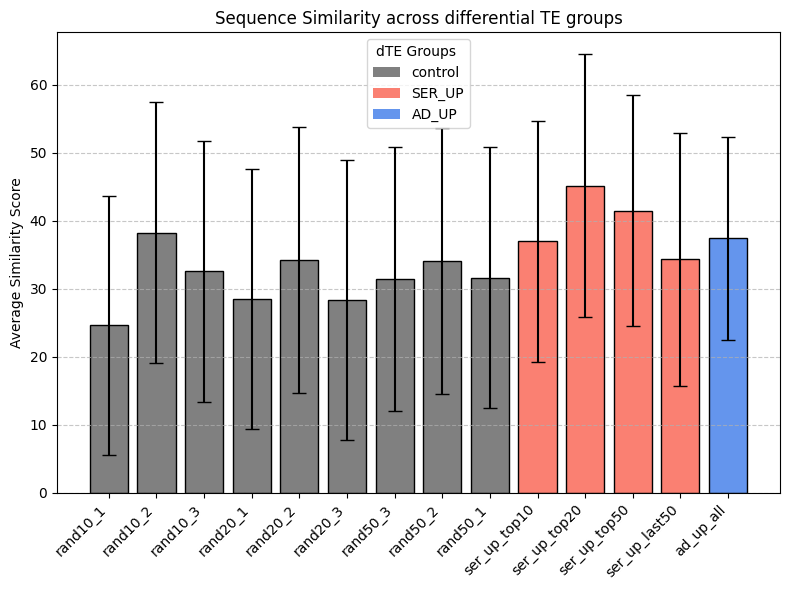

In [84]:


bar_colors = [condition_colors[cond] for cond in total_sum_df['condition'] ]

plt.figure(figsize=(8, 6))


plt.bar(total_sum_df.index, total_sum_df['avg_pctIdentity'] , yerr=total_sum_df['std_pctIdentity'], capsize=5, color=bar_colors, edgecolor='black')

plt.xticks(rotation=45, ha='right') 

legend_elements = [Patch(facecolor=color, label=cond) for cond, color in condition_colors.items()]
plt.legend(handles=legend_elements, title='dTE Groups ')

plt.ylabel('Average Similarity Score')
plt.title('Sequence Similarity across differential TE groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [85]:
sum_of_sum_df = total_sum_df.groupby('condition').mean()

In [86]:
sum_of_sum_df

,avg_pctIdentity,std_pctIdentity,num_element
condition,,,
AD_UP,37.398733,14.883727,9.0
SER_UP,39.491229,18.155993,32.5
control,31.530037,19.468526,26.666667


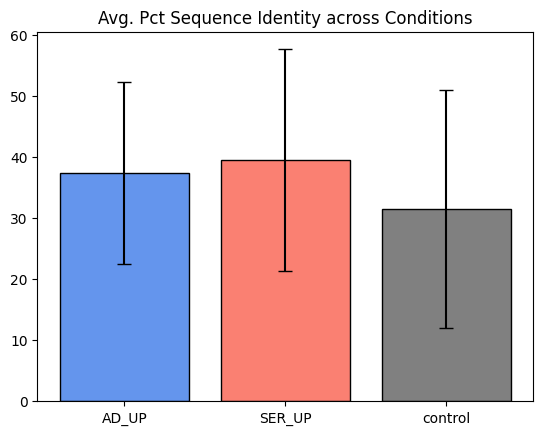

In [91]:
plt.bar( x = sum_of_sum_df.index, height= sum_of_sum_df['avg_pctIdentity'],
        yerr=sum_of_sum_df['std_pctIdentity'], capsize = 5, edgecolor='black', 
        color = ['cornflowerblue' , 'salmon' ,'grey'] )
plt.title( 'Avg. Pct Sequence Identity across Conditions')
plt.show()

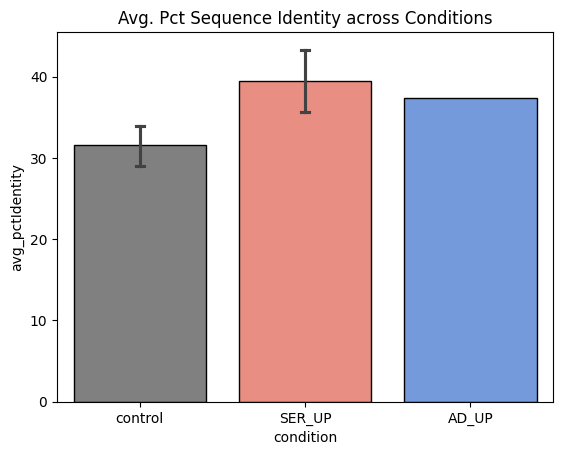

In [7]:
sn.barplot( total_sum_df, y ='avg_pctIdentity' , x = 'condition' , hue= 'condition', palette= condition_colors, edgecolor = 'black', capsize = 0.05 )
plt.title( 'Avg. Pct Sequence Identity across Conditions')
plt.show()

<Axes: xlabel='condition', ylabel='avg_pctIdentity'>

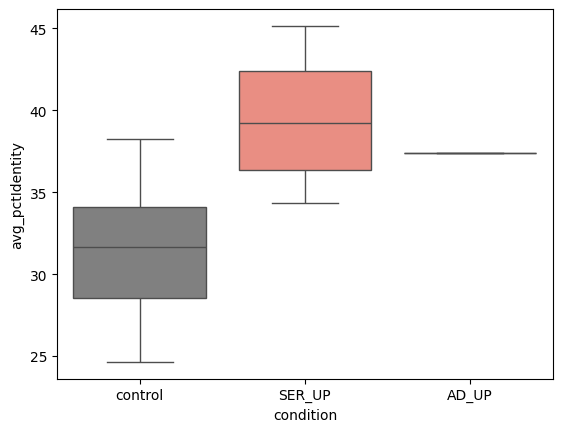

In [99]:
sn.boxplot( total_sum_df, y ='avg_pctIdentity' , x = 'condition' , hue= 'condition', palette= condition_colors )

## calculate p-values

In [9]:
from scipy import stats

ctrl = total_sum_df['avg_pctIdentity'][total_sum_df['condition'] == 'control']
mut = total_sum_df['avg_pctIdentity'][total_sum_df['condition'] == 'SER_UP']
ad = total_sum_df['avg_pctIdentity'][total_sum_df['condition'] == 'AD_UP']
# Assuming equal variances (default)
t_statistic, p_value = stats.ttest_ind(list(mut), list( ctrl) )

In [8]:
[t_statistic, p_value]

[3.1413628745710165, 0.009385572939053337]

In [10]:
t_ser_ad, ser_ad = stats.ttest_ind(list(mut), list( ad) )

/tmp/ipykernel_267860/2158571102.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_ser_ad, ser_ad = stats.ttest_ind(list(mut), list( ad) )
/home/lucy/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/lucy/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [11]:
t_ser_ad, ser_ad 

(nan, nan)

## save data

In [100]:
logi = pd.read_csv("./OUTPUT_EXPLAIN.csv", header = 0, index_col = 0 )

In [101]:
total_sum_df.to_csv("./TCPS_seq_similarity_summary_df.csv", header = True, index = True )

In [102]:
logi['TCPS_seq_similarity_summary_df.csv']  = ['5b' , 'NA' , 'Sequence similarity summary df including all conditions including controls']

In [103]:
logi.to_csv("./OUTPUT_EXPLAIN.csv", header = True, index = True )